# 1. Load Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

# 2. Load Data
The coursera notebook has a customized module lr_utils to load dataset. But that is not available for everyone. So I have downloaded the dataset from the coursera website and now I will be importing that dataset.

In [139]:
train_set_x = pd.read_csv('data/train_set_x.csv')
train_set_y = pd.read_csv('data/train_set_y.csv')
test_set_x = pd.read_csv('data/test_set_x.csv')
test_set_y = pd.read_csv('data/test_set_y.csv')

In [140]:
for data in [train_set_x,train_set_y,test_set_x,test_set_y]:
    data.drop('Unnamed: 0', axis = 1, inplace = True)

In [141]:
print(train_set_x.shape, train_set_y.shape, test_set_x.shape, test_set_y.shape)

(12288, 209) (1, 209) (12288, 50) (1, 50)


In [142]:
train_set_x = np.array(train_set_x)
train_set_y = np.array(train_set_y)
test_set_x = np.array(test_set_x)
test_set_y = np.array(test_set_y)

In [143]:
def sigmoid(z):
    a = 1/(1+np.exp(-z))
    return a

In [144]:
def initilize_parameters(dim):
    W = np.zeros(dim) #dimension in this case will be - (n_px*n_px*3,1)
    b = 0
    return W, b

In [145]:
def propagation(W, b, X, Y):
    '''finding z, a, L, J, dw, db 
    required - w,b, X, Y'''
    m = X.shape[1]
    Z = np.dot(W.T,X) + b #shape (1,m)
    A = sigmoid(Z) #shape (1,m)
    cost = (1/m)*np.sum(-(Y)*np.log(A) - (1-Y)*(np.log(1-A))) #cost function = average of all loss function.
    # we are using normal product (element-wise) because Y and log(A) both have the same dimension and both of them are a number for a training example
    
    dZ = A-Y
    dW = np.dot(X, dZ.T)/m  #dJ/dw = dw = x*dz --> X*(A-Y)
    db = dZ.sum()/m # shape (1,1) 
    
    grad = {'dW':dW, 'db':db}
    return grad, cost

In [146]:
def optimization(W, b, X, Y, num_iteration, alpha, print_cost = False):
    costs = []
    for i in range(num_iteration):
        
        # gradients
        grads, cost = propagation(W,b,X,Y)
        dW = grads['dW']
        db = grads['db']

        # update parameters
        W = W - alpha*dW
        b = b - alpha*db
        
        # print cost for every 100th iteration
        if i%100 == 0:
            costs.append(cost)
        if print_cost == True and i%100 == 0:
            print(f"cost after {i}th iteration:{cost}")
    
    params = {'W':W, 'b':b}
    grads = {'dW':dW, 'db':db}
    
    return params, grads, costs 

In [147]:
W, b, X, Y = np.array([[1], [2]]), 2, np.array([[1,2], [3,4]]), np.array([[1, 0]])
grads, cost = propagation(W, b, X, Y)
print ("dW = " + str(grads["dW"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dW = [[0.99993216]
 [1.99980262]]
db = 0.49993523062470574
cost = 6.000064773192205


In [148]:
params, grads, costs = optimization(W, b, X, Y, num_iteration= 100, alpha= 0.009, print_cost = False)

print ("W = " + str(params["W"]))
print ("b = " + str(params["b"]))
print ("dW = " + str(grads["dW"]))
print ("db = " + str(grads["db"]))

W = [[0.1124579 ]
 [0.23106775]]
b = 1.5593049248448891
dW = [[0.90158428]
 [1.76250842]]
db = 0.4304620716786828


In [149]:
params, grads, cost = optimization(W, b, X, Y, 1000, 0.3, print_cost = True)

cost after 0th iteration:6.000064773192205
cost after 100th iteration:0.2724906479359414
cost after 200th iteration:0.16610064610494046
cost after 300th iteration:0.11701587919814488
cost after 400th iteration:0.08956095644802074
cost after 500th iteration:0.07223764238667835
cost after 600th iteration:0.060387871321805675
cost after 700th iteration:0.051803485634201854
cost after 800th iteration:0.04531342894137105
cost after 900th iteration:0.04024254394675909


In [150]:
def predict(W, b, X):
#     W = W.reshape(X.shape[1],1)
    A = sigmoid(np.dot(W.T, X) + b) #the predictions - shape - (1,m)
    y_pred = np.zeros((1,A.shape[1]))
    
    for i in range(A.shape[1]):
        if A[0,i]>0.5:
            y_pred[0,i]=1
        else:
            y_pred[0,i] = 0
    
    return A, Z, y_pred

In [180]:
def model(train_x, train_y, test_x, test_y, num_iteration, alpha, print_cost = False):
    #training our model
    #intitialize parameters:
    m = train_x.shape[1]
    n = train_x.shape[0]
    W,b = initilize_parameters((n,1))
    
    #forward propagation
    grad, cost = propagation(W,b,train_x, train_y)
    
    #extract gradients
    dW = grad['dW']
    db = grad['db']
    
    #back propagation:
    params, grads, costs = optimization(W,b,train_x, train_y,  num_iteration, alpha, print_cost)
    
    #extract parameters and gradients
    W = params['W']
    b = params['b']
    dW = grads['dW']
    db = grads['db']
    
    # make prediction:
    A, Z, y_predicted_train = predict(W, b, train_x)
    A, Z, y_predicted_test = predict(W,b, test_x)
    
    #accuracy:
    differences_train = (y_predicted_train - train_y)
    differences_test = (y_predicted_test - test_y)
    
    correct_prediction_train = (differences_train==0).sum() #number of zeros in differences_train
    correct_prediction_test = (differences_test==0).sum() #number of zeros in differences_test
    
    accuracy_train = correct_prediction_train/train_y.shape[1]
    accuracy_test = correct_prediction_test/test_y.shape[1]
    
    print(accuracy_train, accuracy_test)
    return y_predicted_train, y_predicted_test, A, Z, differences_train, differences_test

In [182]:
y_predicted_train, y_predicted_test, A, Z, differences_train, differences_test = model(train_set_x,train_set_y,test_set_x, test_set_y,10000,0.0003, True)

cost after 0th iteration:0.6931471805599453
cost after 100th iteration:0.6254741983805133
cost after 200th iteration:0.6150649153206877
cost after 300th iteration:0.6078426806708578
cost after 400th iteration:0.6020920760315909
cost after 500th iteration:0.5971430946044409
cost after 600th iteration:0.5927029668239371
cost after 700th iteration:0.5886264772768176
cost after 800th iteration:0.584832043386549
cost after 900th iteration:0.5812685476354333
cost after 1000th iteration:0.577900997177046
cost after 1100th iteration:0.5747037258071908
cost after 1200th iteration:0.5716568860328716
cost after 1300th iteration:0.5687445027318226
cost after 1400th iteration:0.5659533257226419
cost after 1500th iteration:0.5632721170511988
cost after 1600th iteration:0.5606911868236855
cost after 1700th iteration:0.5582020771188063
cost after 1800th iteration:0.5557973374409302
cost after 1900th iteration:0.5534703588162203
cost after 2000th iteration:0.5512152468291814
cost after 2100th iteration

In [185]:
y_predicted_train, y_predicted_test, A, Z, differences_train, differences_test = model(train_set_x,train_set_y,test_set_x, test_set_y,10000,0.03, True)

cost after 0th iteration:0.6931471805599453
cost after 100th iteration:4.1951486381215926
cost after 200th iteration:5.703759087552092
cost after 300th iteration:0.9896755997164715
cost after 400th iteration:0.9440968925860884
cost after 500th iteration:5.269416743561517
cost after 600th iteration:2.201651664181324
cost after 700th iteration:8.014781374937032
cost after 800th iteration:2.2335112863425053
cost after 900th iteration:0.5001056197582409
cost after 1000th iteration:3.6667542256139103
cost after 1100th iteration:1.1085188824310679
cost after 1200th iteration:1.7236486826168456
cost after 1300th iteration:3.4964051831886898
cost after 1400th iteration:3.2363556111731895
cost after 1500th iteration:3.0347657447366
cost after 1600th iteration:2.86015503359166
cost after 1700th iteration:2.7091137057069776
cost after 1800th iteration:2.5762822178646276
cost after 1900th iteration:2.454928927084223
cost after 2000th iteration:2.3386624372685927
cost after 2100th iteration:2.22230

In [191]:

# GRADED FUNCTION: sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    ### START CODE HERE ### (≈ 1 line of code)
    s = 1 / (1 + np.exp(-z))
    ### END CODE HERE ###
    
    return s

In [192]:

# GRADED FUNCTION: initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    w = np.zeros(shape=(dim, 1))
    b = 0
    ### END CODE HERE ###

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [193]:

# GRADED FUNCTION: propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    Tips:
    - Write your code step by step for the propagation
    """
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    ### START CODE HERE ### (≈ 2 lines of code)
    A = sigmoid(np.dot(w.T, X) + b)  # compute activation
    cost = (- 1 / m) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A)))  # compute cost
    ### END CODE HERE ###
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    ### START CODE HERE ### (≈ 2 lines of code)
    dw = (1 / m) * np.dot(X, (A - Y).T)
    db = (1 / m) * np.sum(A - Y)
    ### END CODE HERE ###

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [194]:

# GRADED FUNCTION: optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation (≈ 1-4 lines of code)
        ### START CODE HERE ### 
        grads, cost = propagate(w, b, X, Y)
        ### END CODE HERE ###
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule (≈ 2 lines of code)
        ### START CODE HERE ###
        w = w - learning_rate * dw  # need to broadcast
        b = b - learning_rate * db
        ### END CODE HERE ###
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training examples
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [196]:

# GRADED FUNCTION: predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    ### START CODE HERE ### (≈ 1 line of code)
    A = sigmoid(np.dot(w.T, X) + b)
    ### END CODE HERE ###
    
    for i in range(A.shape[1]):
        # Convert probabilities a[0,i] to actual predictions p[0,i]
        ### START CODE HERE ### (≈ 4 lines of code)
        Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0
        ### END CODE HERE ###
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [197]:

# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    ### START CODE HERE ###
    # initialize parameters with zeros (≈ 1 line of code)
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    ### END CODE HERE ###

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [200]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 10000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.709726
Cost after iteration 200: 0.657712
Cost after iteration 300: 0.614611
Cost after iteration 400: 0.578001
Cost after iteration 500: 0.546372
Cost after iteration 600: 0.518331
Cost after iteration 700: 0.492852
Cost after iteration 800: 0.469259
Cost after iteration 900: 0.447139
Cost after iteration 1000: 0.426262
Cost after iteration 1100: 0.406617
Cost after iteration 1200: 0.388723
Cost after iteration 1300: 0.374678
Cost after iteration 1400: 0.365826
Cost after iteration 1500: 0.358532
Cost after iteration 1600: 0.351612
Cost after iteration 1700: 0.345012
Cost after iteration 1800: 0.338704
Cost after iteration 1900: 0.332664
Cost after iteration 2000: 0.326870
Cost after iteration 2100: 0.321305
Cost after iteration 2200: 0.315951
Cost after iteration 2300: 0.310795
Cost after iteration 2400: 0.305822
Cost after iteration 2500: 0.301023
Cost after iteration 2600: 0.296386
Cost after iteration 2700: 0.291901
Cost

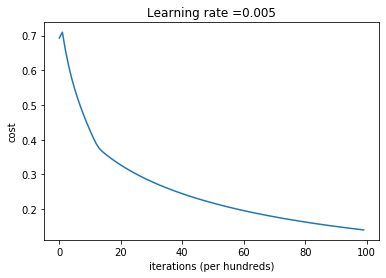

In [202]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

In [189]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    ### START CODE HERE ###
    # initialize parameters with zeros (≈ 1 line of code)
    w, b = initilize_parameters(X_train.shape[0])

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimization(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["W"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    ### END CODE HERE ###

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [190]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

cost after 0th iteration:0.6931471805599453


KeyboardInterrupt: 